In [1]:
import tensorflow as tf
from sklearn.datasets import load_sample_images
from tensorflow.train import BytesList, Feature, Features, Example

import utils

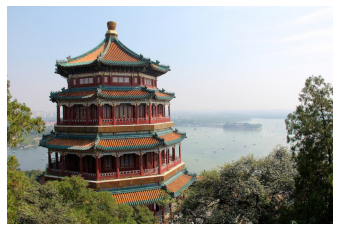

In [2]:
image = load_sample_images()['images'][0]
utils.plot_image(image)

In [3]:
encoded = tf.io.encode_jpeg(image)

tf_record_image = Example(
    features=Features(
        feature={
            'image': Feature(bytes_list=BytesList(value=[encoded.numpy()]))
        }
    )
)

serialized = tf_record_image.SerializeToString()

In [4]:
feature_description = {
    'image': tf.io.VarLenFeature(tf.string)
}

example_with_image = tf.io.parse_single_example(serialized, feature_description)

decoded = tf.io.decode_jpeg(example_with_image['image'].values[0])

In [5]:
decoded

<tf.Tensor: shape=(427, 640, 3), dtype=uint8, numpy=
array([[[171, 200, 230],
        [172, 201, 231],
        [172, 201, 231],
        ...,
        [247, 251, 254],
        [248, 252, 255],
        [248, 252, 255]],

       [[169, 198, 228],
        [170, 199, 229],
        [171, 200, 230],
        ...,
        [248, 252, 255],
        [248, 252, 255],
        [248, 252, 255]],

       [[171, 201, 229],
        [171, 201, 229],
        [172, 202, 230],
        ...,
        [252, 253, 255],
        [252, 253, 255],
        [252, 253, 255]],

       ...,

       [[ 85,  84,   4],
        [145, 142,  65],
        [120, 114,  40],
        ...,
        [ 42,  45,  38],
        [  8,  14,   4],
        [  5,  11,   0]],

       [[121, 115,  39],
        [127, 121,  47],
        [122, 114,  42],
        ...,
        [  7,  13,   3],
        [  8,  14,   2],
        [ 22,  28,  16]],

       [[112, 104,  29],
        [103,  95,  22],
        [111, 101,  30],
        ...,
        [ 45,  51,  4

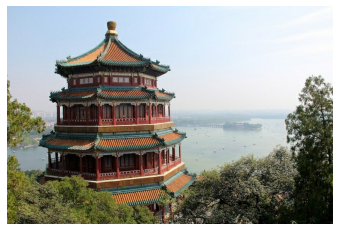

In [6]:
utils.plot_image(decoded)